# Module 2- Plotting in Financial Markets


   ### Welcome to the Answer notebook for Module 2 ! 
Make sure that you've submitted the module 1 notebook and unlocked Module 2 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 2.1 
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

>Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock

>This would be helpful if we are to train our model to take NLP inputs.

In [1]:
import numpy as np 
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
from matplotlib import style
import seaborn as sns
import matplotlib.mlab as mlab

In [3]:
week_2 = pd.read_csv("week2.csv")
week_2['Date'] = pd.to_datetime(week_2['Date'])
week_2.set_index('Date', drop = False, inplace = True)
week_2.head(5)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Day_Pct_Change,Trend,new_column
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,INFY,EQ,2017-05-15,964.25,963.5,963.50,949.10,953.25,951.55,951.49,3648582,3.471580e+09,75335,3052819,83.67,5,2017,0.0,Slight or No change,NaN
2017-05-16,INFY,EQ,2017-05-16,951.55,953.1,960.15,946.95,956.00,955.00,952.92,3065084,2.920775e+09,71808,1858063,60.62,5,2017,0.4,Slight or No change,NaN
2017-05-17,INFY,EQ,2017-05-17,955.00,951.6,958.45,943.85,952.90,952.80,949.48,1457754,1.384110e+09,75429,792251,54.35,5,2017,-0.2,Slight or No change,NaN
2017-05-18,INFY,EQ,2017-05-18,952.80,943.0,973.90,942.85,960.25,961.75,962.61,4028924,3.878282e+09,120990,2309450,57.32,5,2017,0.9,Slight Positive,NaN
2017-05-19,INFY,EQ,2017-05-19,961.75,961.5,962.70,947.85,957.40,957.95,954.18,2128698,2.031155e+09,88897,1457747,68.48,5,2017,-0.4,Slight or No change,NaN


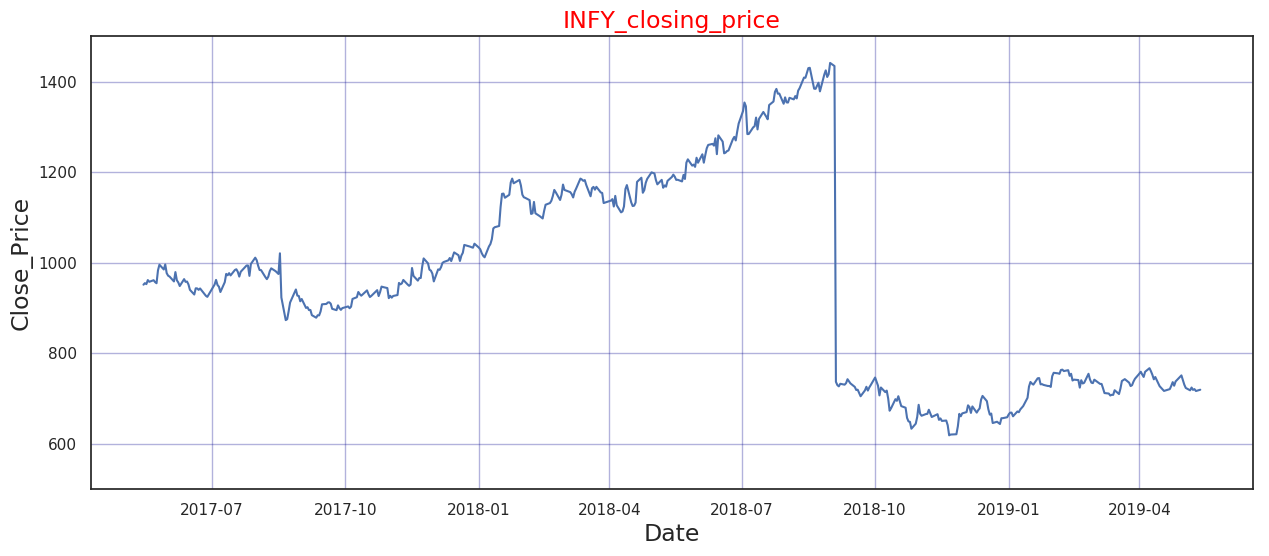

In [36]:
#plot close price
plt.figure(figsize = (15,6), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.ylim(500,1500)
plt.xlabel('Date', size = 17)
plt.ylabel('Close_Price', size = 17)
plt.plot(week_2['Close Price'])
plt.title('INFY_closing_price', size = 17, color='red')
plt.show()

# Query 2.2 
A stem plot is a discrete series plot, ideal for plotting daywise data. it can be plotted using the plt.stem() function.
Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

Date
2018-09-04   -48.6
2017-08-18    -9.6
2017-08-21    -5.4
2018-07-05    -4.5
2018-10-11    -3.9
Name: Day_Pct_Change, dtype: float64
Date
2018-01-16    3.9
2018-04-20    4.0
2018-10-31    4.1
2018-11-28    4.3
2017-08-17    4.7
Name: Day_Pct_Change, dtype: float64


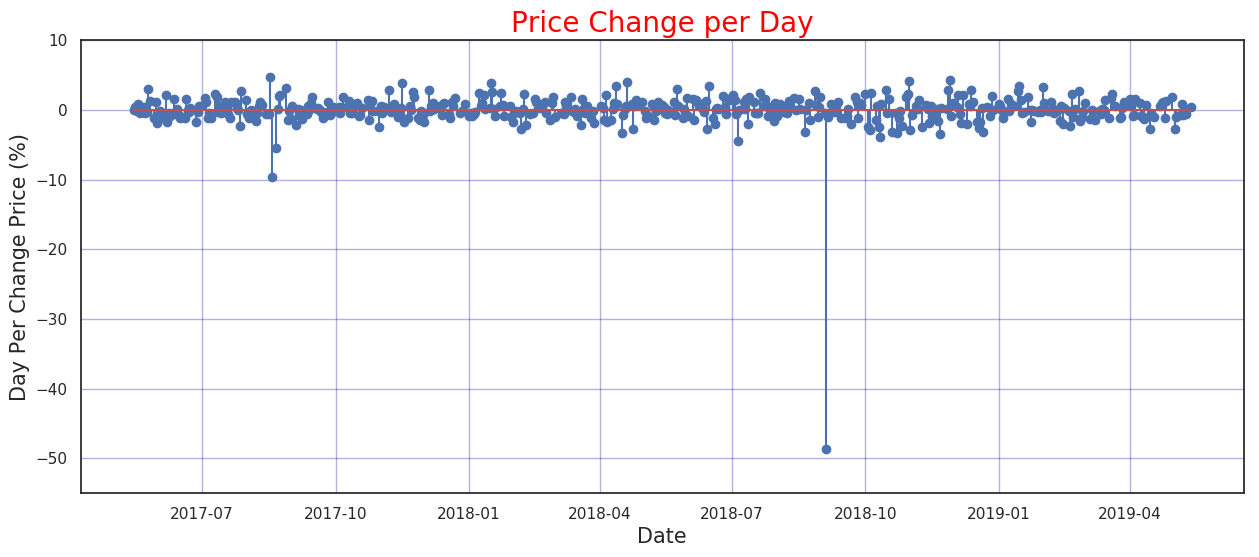

In [34]:
print(week_2['Day_Pct_Change'].sort_values().head())
print(week_2['Day_Pct_Change'].sort_values().tail())


plt.figure(figsize = (15,6), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.stem( week_2['Date'], week_2['Day_Pct_Change'])
plt.ylim(-55,10)
plt.xlabel('Date')
plt.ylabel('Day Per Change')
plt.xlabel('Date', size = 15)
plt.ylabel('Day Per Change Price (%)', size = 15)
plt.title('Price Change per Day', size = 20, color='red')
plt.show()

# Query 2.3
Plot the daily volumes as well and compare the percentage steam plot to it. Document your analysis of the relationship between volume and daily percentage change. 

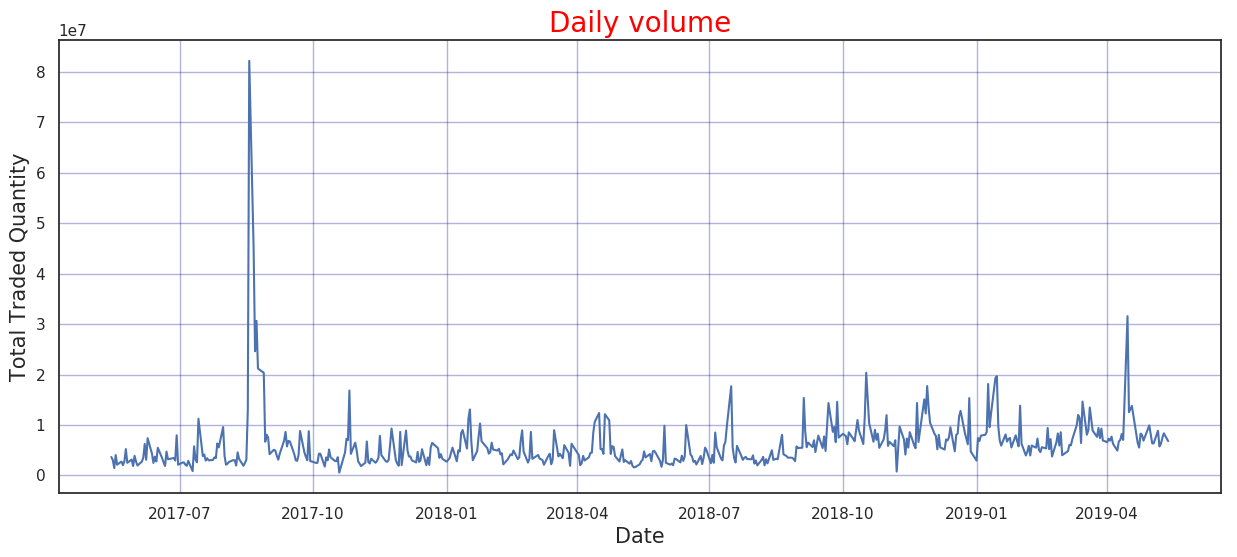

In [33]:
# plot Daily volume
plt.figure(figsize = (15,6), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.plot( week_2['Date'], week_2['Total Traded Quantity'])
plt.xlabel('Date')
plt.ylabel('Day Per Change')
plt.xlabel('Date', size = 15)
plt.ylabel('Total Traded Quantity', size = 15)
plt.title('Daily volume', size = 20, color='red')
plt.show()

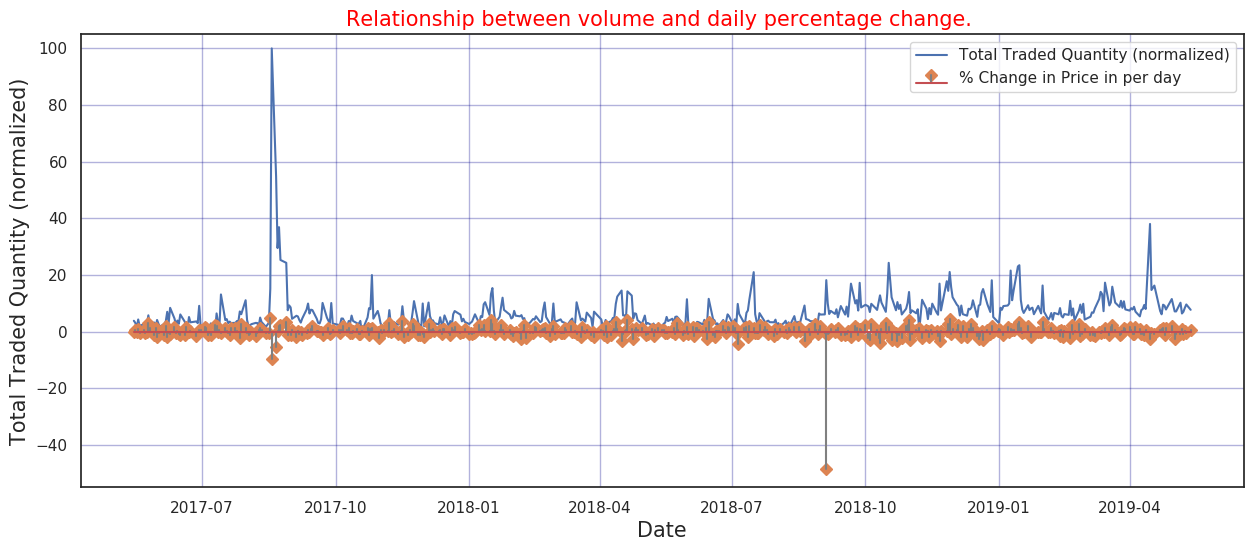

In [32]:
max_old = week_2['Total Traded Quantity'].max()
min_old = week_2['Total Traded Quantity'].min()
tota_traded_quantity_normalized = ((week_2['Total Traded Quantity'] - min_old)/(max_old - min_old)) * (1 - 0) + 0

plt.figure(figsize = (15,6), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.plot(tota_traded_quantity_normalized*100)
plt.stem( week_2['Date'], week_2['Day_Pct_Change'], linefmt='grey', markerfmt='D')
plt.legend(['Total Traded Quantity (normalized)', '% Change in Price in per day'])
plt.xlabel('Date', size = 15)
plt.ylabel('Total Traded Quantity (normalized)', size = 15)
plt.title('Relationship between volume and daily percentage change. ', size = 15, color='red')
plt.ylim(-55,105)
plt.show()

# Query 2.4 
We had created a Trend column in module 1. we want to see how often each trend type occurs. this can be seen as a pie chart, with each sector representing the precentage of days each trend occures. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with trend column to group all days with the same trend into a single group before plottingthe pie chart. from the grouped data create a Bar plot of average and median values of the 'Total Traded Quantity' by Trend type. 

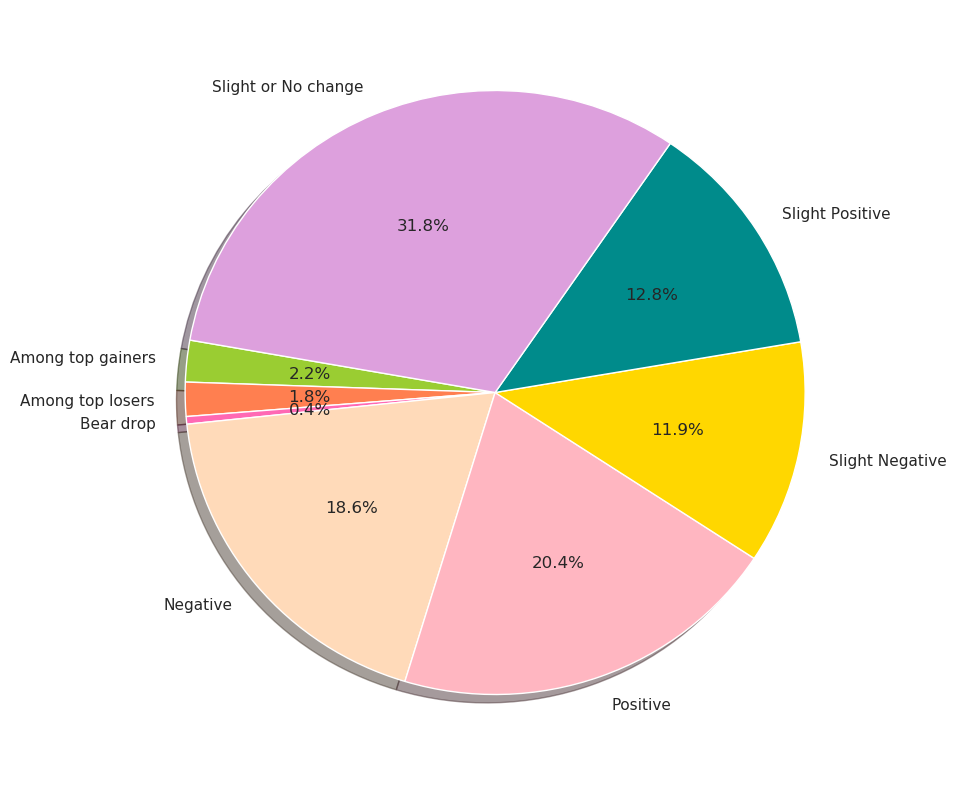

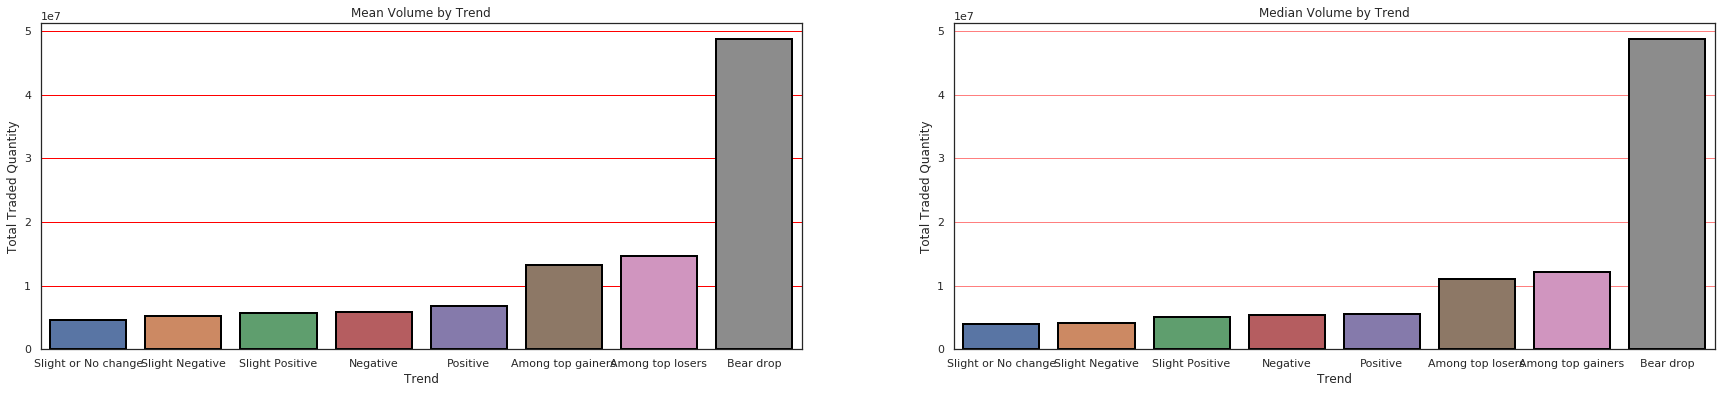

In [31]:
Trend_data = week_2.groupby('Trend').count()['Symbol']
Trend_data.keys()
volume_by_trend = week_2.groupby('Trend', as_index=False)['Total Traded Quantity']

plt.figure(figsize = (10,10), dpi = 100)

colors = ['yellowgreen', 'coral', 'hotpink', 'peachpuff', 'lightpink', 'gold','darkcyan','plum']
plt.pie(Trend_data, labels = Trend_data.keys(),autopct = '%1.1f%%', startangle=170, colors = colors,shadow=True,wedgeprops ={ 'linewidth' :1 ,'edgecolor' : "white" })

fig, axes = pyplot.subplots(figsize=(30, 6), nrows=1, ncols=2)
axes[0].grid(linewidth='1.0', color='red')
axes[1].grid(linewidth='0.5', color='red')

axes[0].set_title("Mean Volume by Trend")
sns.barplot(ax=axes[0], x='Trend', y='Total Traded Quantity', data=volume_by_trend.mean().sort_values('Total Traded Quantity'),edgecolor=(0,0,0),linewidth=2);

axes[1].set_title("Median Volume by Trend")
sns.barplot(ax=axes[1], x='Trend', y='Total Traded Quantity', data=volume_by_trend.median().sort_values('Total Traded Quantity'),edgecolor=(0,0,0),linewidth=2);


# Query 2.5
Plot the daily return (percentage) distribution as a histogram. 
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes.

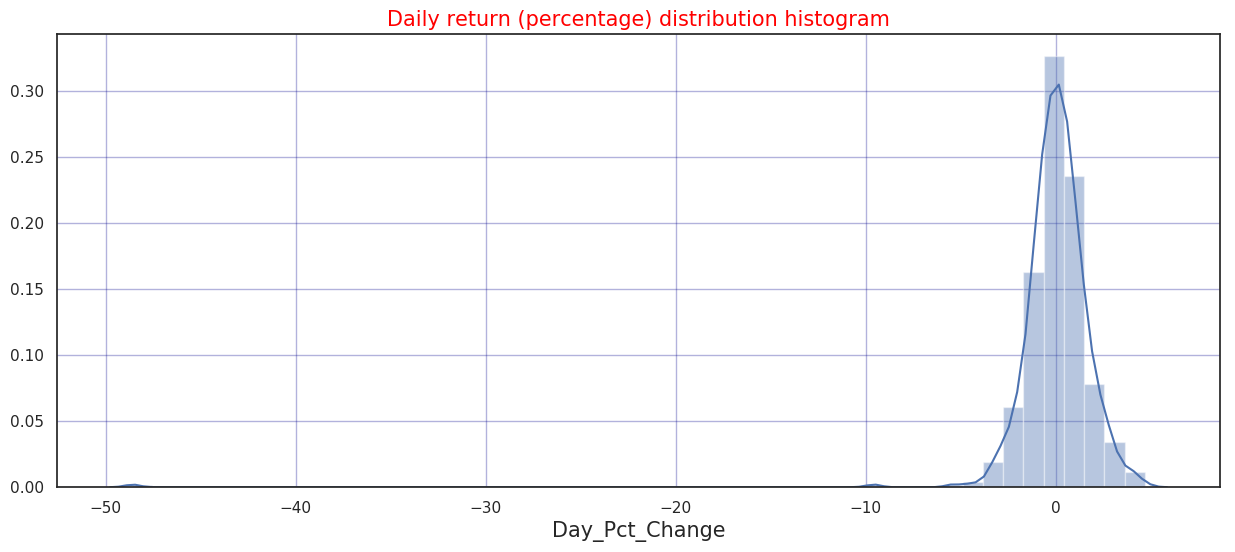

In [30]:
plt.figure(figsize = (15,6), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
sns.distplot(week_2['Day_Pct_Change'], kde=True, rug=False);
plt.xlabel('Day_Pct_Change', size = 15)
plt.title('Daily return (percentage) distribution histogram', size = 15, color='red')
plt.show()

# Query 2.6
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price.

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.

Using seaborn, analyse the correlation between the percentage in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more , check out these resources on correlation and diversification. 

In [11]:
#1 Data set (AxisBank)
AXISBANK_stock = pd.read_csv("AXISBANK.csv")
AXISBANK_stock = AXISBANK_stock[AXISBANK_stock['Series'] == 'EQ'][['Close Price', 'Date']][1:]
AXISBANK_stock.set_index('Date', drop = False, inplace = True)
    
#2 Data set (HDFCBank)
HDFCBANK_stock = pd.read_csv("HDFCBANK.csv")
HDFCBANK_stock = HDFCBANK_stock[HDFCBANK_stock['Series'] == 'EQ'][['Close Price', 'Date']][1:]
HDFCBANK_stock.set_index('Date', drop = False, inplace = True)

#3 Data set (HEROMOTOCO)
HEROMOTOCO_stock = pd.read_csv("HEROMOTOCO.csv")
HEROMOTOCO_stock = HEROMOTOCO_stock[HEROMOTOCO_stock['Series'] == 'EQ'][['Close Price', 'Date']][1:]
HEROMOTOCO_stock.set_index('Date', drop = False, inplace = True)

#4 Data set (RELIANCE)
RELIANCE_stock = pd.read_csv("RELIANCE.csv")
RELIANCE_stock = RELIANCE_stock[RELIANCE_stock['Series'] == 'EQ'][['Close Price', 'Date']][1:]
RELIANCE_stock.set_index('Date', drop = False, inplace = True)

#5 Data set (TITAN)
TITAN_stock = pd.read_csv("TITAN.csv")
TITAN_stock = TITAN_stock[TITAN_stock['Series'] == 'EQ'][['Close Price', 'Date']][1:]
TITAN_stock.set_index('Date', drop = False, inplace = True)


company_data = pd.DataFrame({'AXISBANK':AXISBANK_stock['Close Price'],'HDFCBANK':HDFCBANK_stock['Close Price'],'HEROMOTOCO':HEROMOTOCO_stock['Close Price'],'RELIANCE':RELIANCE_stock['Close Price'],'TITAN':TITAN_stock['Close Price']})
company_data.head()


,AXISBANK,HDFCBANK,HEROMOTOCO,RELIANCE,TITAN
Date,,,,,
16-May-2017,501.5,1559.65,3619.40,1356.30,488.30
17-May-2017,502.8,1557.15,3645.95,1353.10,481.75
18-May-2017,492.0,1557.10,3592.05,1327.35,471.65
19-May-2017,501.7,1561.25,3571.65,1318.85,471.15
22-May-2017,502.3,1576.00,3562.45,1324.15,481.40


In [12]:
company_data_per_change = pd.DataFrame({'AXISBANK_Day_Pct_Change':company_data['AXISBANK'].pct_change(),
                                        'HDFCBANK_Day_Pct_Change':company_data['HDFCBANK'].pct_change(),
                                        'HEROMOTOCO_Day_Pct_Change':company_data['HEROMOTOCO'].pct_change(),
                                        'RELIANCE_Day_Pct_Change':company_data['RELIANCE'].pct_change(),
                                        'TITAN_Day_Pct_Change':company_data['TITAN'].pct_change()})
company_data_per_change.dropna(inplace = True)
company_data_per_change.tail()

,AXISBANK_Day_Pct_Change,HDFCBANK_Day_Pct_Change,HEROMOTOCO_Day_Pct_Change,RELIANCE_Day_Pct_Change,TITAN_Day_Pct_Change
Date,,,,,
07-May-2019,-0.007492,-0.002620,-0.001560,-0.029894,0.003371
08-May-2019,-0.008560,-0.006502,-0.010940,-0.032787,0.002025
09-May-2019,-0.006118,-0.007086,0.015222,-0.033091,0.014467
10-May-2019,0.005540,0.002444,-0.011999,-0.004218,0.025035
13-May-2019,-0.004013,-0.004050,0.001376,-0.015266,0.011130


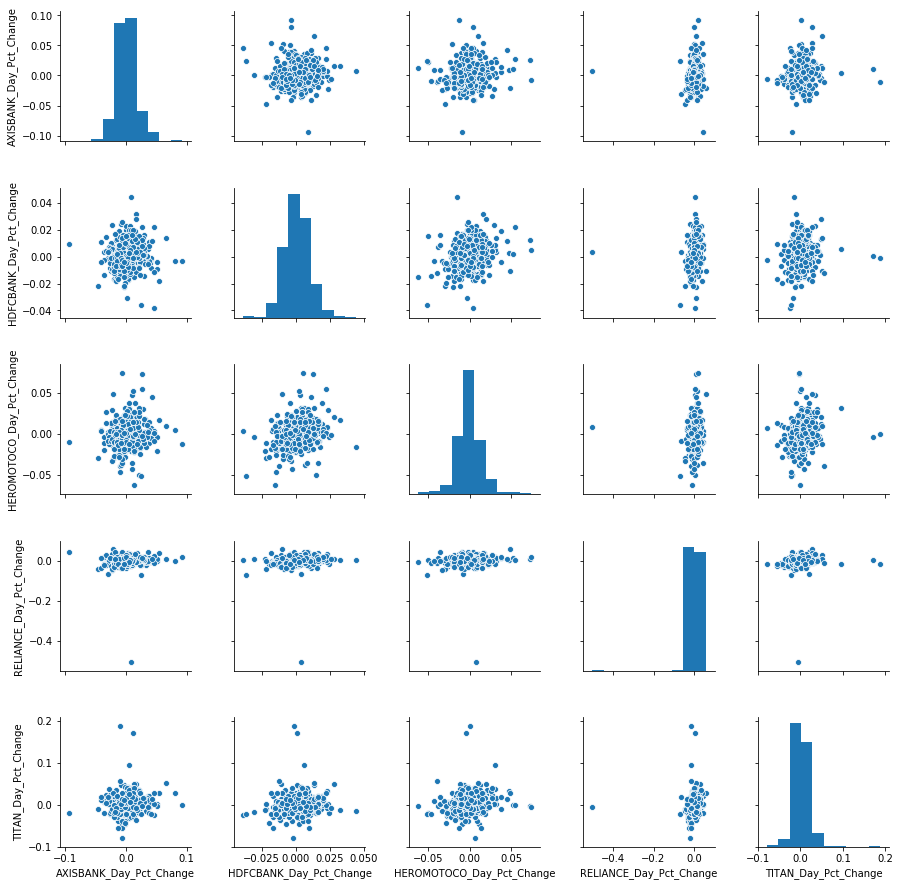

In [13]:
sns.pairplot(company_data_per_change)
plt.show()


# Query 2.7

Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.

You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.

Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [14]:
rolling_average_7_day = company_data_per_change['TITAN_Day_Pct_Change'].rolling(7,axis = 0).mean()
rolling_average_7_day.dropna(inplace = True)

std_deviation = rolling_average_7_day.std()
print("The 7 day rolling standard deviation of the percentage change:",std_deviation)
average = rolling_average_7_day.mean()
print("The 7 day rolling Average of the percentage change:",average)

The 7 day rolling standard deviation of the percentage change: 0.0074103542962673345
The 7 day rolling Average of the percentage change: 0.001943725834154275


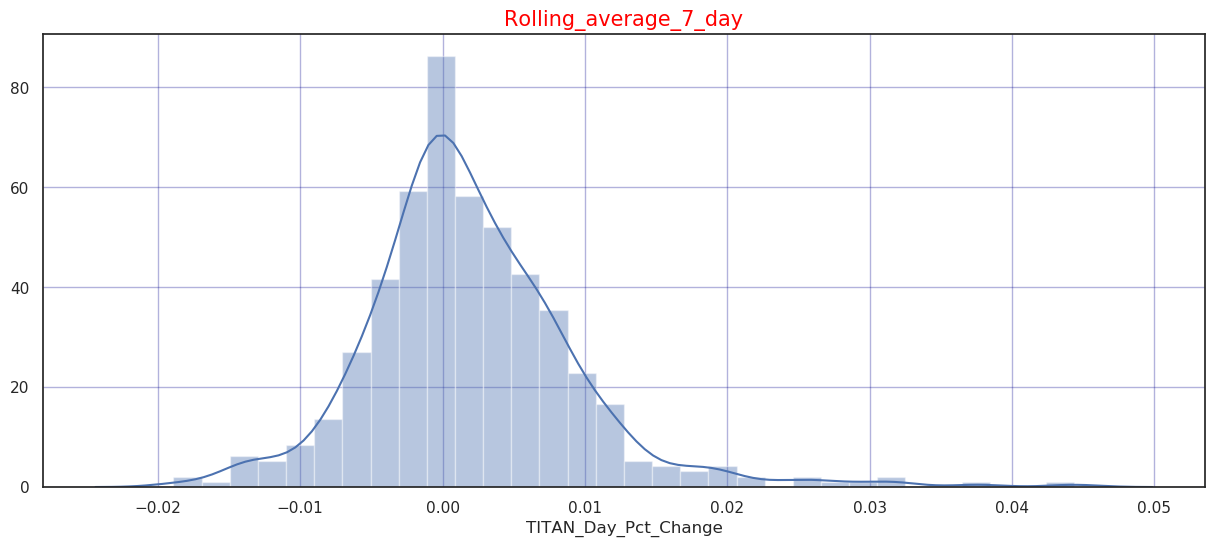

In [28]:
plt.figure(figsize = (15,6), dpi = 100)
plt.grid(color = 'darkBlue', alpha = 0.3)
sns.distplot(rolling_average_7_day, kde = True)
plt.title('Rolling_average_7_day', size = 15, color='red')
plt.show()

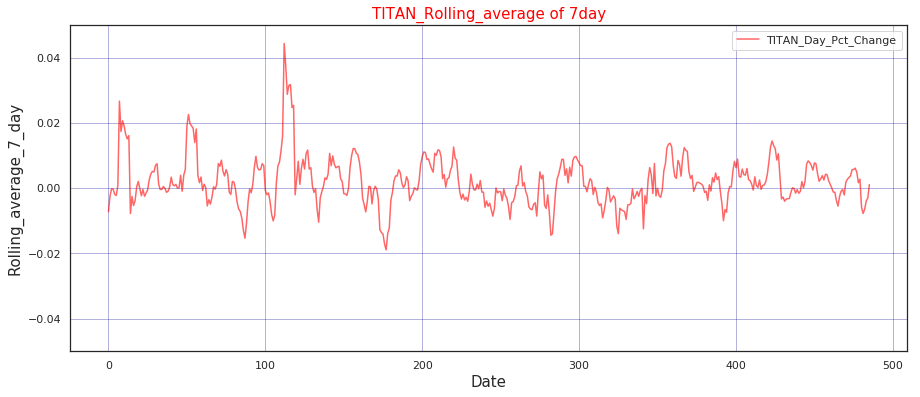

In [27]:
rolling_average_7_day.reset_index().plot(kind = 'line', alpha = 0.6, color = 'Red', figsize = (15,6))
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.ylim(-0.050,0.050)
plt.xlabel('Date', size = 15)
plt.ylabel('Rolling_average_7_day', size = 15)
plt.title('TITAN_Rolling_average of 7day', size = 15, color='red')
plt.show()

# Query 2.8 
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta'.

(We will be covering this in length in module 3)



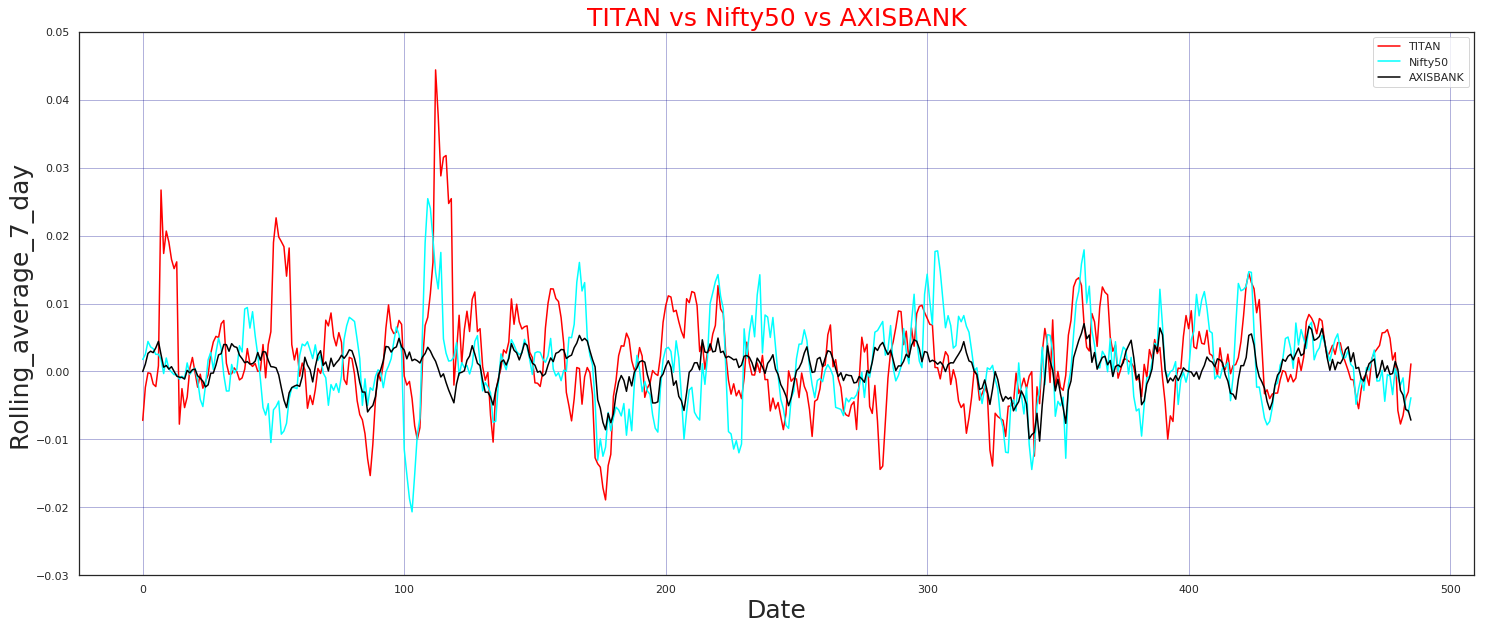

In [26]:
Nifty50 = pd.read_csv("Nifty50.csv")
Nifty50 = Nifty50[['Close', 'Date']][1:]
Nifty50.set_index('Date', drop = False, inplace = True)

nifty_per_change = Nifty50['Close'].pct_change()
nifty_per_change.dropna(inplace = True)

nifty_rolling_average_7_day = nifty_per_change.rolling(7,axis = 0).mean()
nifty_rolling_average_7_day.dropna(inplace = True)

AXISBANK_rolling_average_7_day = company_data_per_change['AXISBANK_Day_Pct_Change'].rolling(7,axis = 0).mean()
AXISBANK_rolling_average_7_day.dropna(inplace = True)

sns.set(style = 'white')

rolling_average_7_day.reset_index(2,True).plot(color = 'Red',figsize = (25,10))
AXISBANK_rolling_average_7_day.reset_index(2,True).plot(color = 'aqua',figsize = (25,10))
nifty_rolling_average_7_day.reset_index(2,True).plot(color = 'black',figsize = (25,10))

plt.ylim(-0.03,0.05)
plt.xlabel('Date', size = 25)
plt.ylabel('Rolling_average_7_day', size = 25)
plt.title('TITAN vs Nifty50 vs AXISBANK', size = 25, color='red')
plt.legend(['TITAN', 'Nifty50','AXISBANK'])
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.show()

# Query 2.9 

Trade Calls - Using Simple Moving Averages.

Plot the 21 day and 34 day Moving average with the average price and decide a Call ! Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 

One of the most widely used technical indicators.


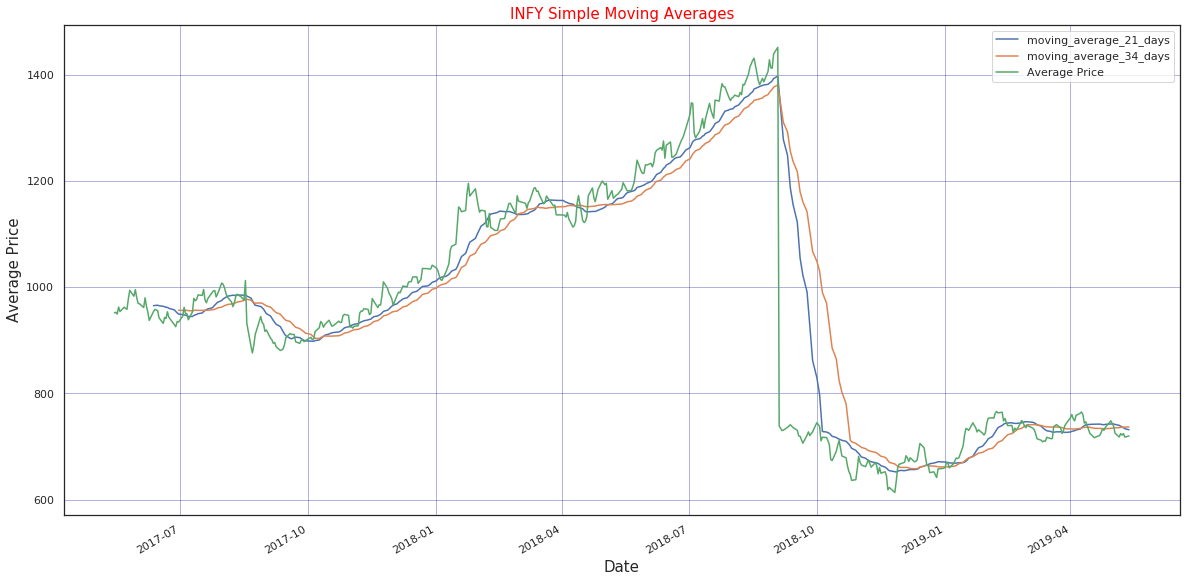

In [25]:
Simple_Moving_Averages = pd.DataFrame({'moving_average_21_days': week_2['Average Price'].rolling(21).mean(),
                        'moving_average_34_days':week_2['Average Price'].rolling(34).mean(),
                        'Average Price':week_2['Average Price']})

Simple_Moving_Averages[["moving_average_21_days", "moving_average_34_days","Average Price"]].plot(figsize=(20,10))
plt.xlabel('Date', size = 15)
plt.ylabel('Average Price', size = 15)
plt.title('INFY Simple Moving Averages', size = 15, color='red')
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.legend()
plt.show()

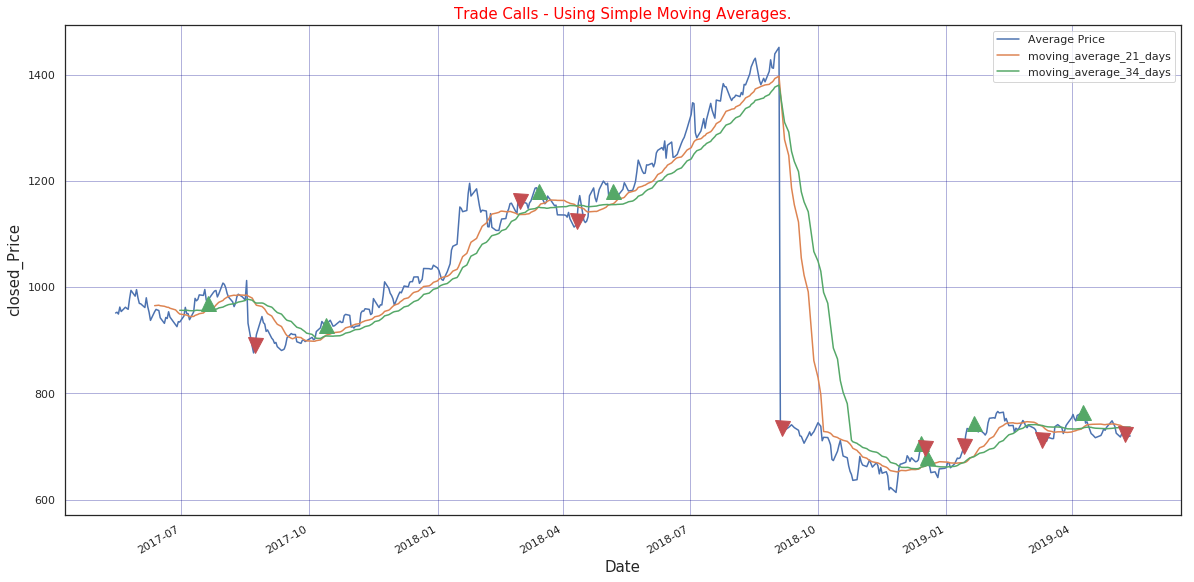

In [23]:
prev_index = Simple_Moving_Averages.index[0]
prev_row = Simple_Moving_Averages[:prev_index]
short_sma_higher = prev_row["moving_average_21_days"][0] > prev_row["moving_average_34_days"][0]
Simple_Moving_Averages['Trade_Call'] = 'HODL'

for index, row in Simple_Moving_Averages.iterrows():
    if row["moving_average_21_days"] and row["moving_average_34_days"]:    
        if short_sma_higher       and row["moving_average_21_days"] < row["moving_average_34_days"]:
            result = "SELL"
        elif not short_sma_higher and row["moving_average_21_days"] > row["moving_average_34_days"]:
            result = "BUY"
        else:
            result = "HODL" 
        Simple_Moving_Averages.at[index, 'Trade_Call'] = result
        short_sma_higher = row["moving_average_21_days"] > row["moving_average_34_days"]                        
    
Simple_Moving_Averages_Trand_call = Simple_Moving_Averages[["Average Price", "moving_average_21_days", "moving_average_34_days",
                          "Trade_Call"]][ Simple_Moving_Averages['Trade_Call'] != "HODL" ]


fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
Simple_Moving_Averages[["Average Price", "moving_average_21_days", "moving_average_34_days"]].plot(ax=ax1)

ax1.plot( Simple_Moving_Averages["Average Price"][ Simple_Moving_Averages['Trade_Call'] == 'BUY' ].index, 
          Simple_Moving_Averages["Average Price"][ Simple_Moving_Averages['Trade_Call'] == 'BUY' ], 
          '^', markersize=15, color='g' )

ax1.plot( Simple_Moving_Averages["Average Price"][ Simple_Moving_Averages['Trade_Call'] == 'SELL' ].index, 
          Simple_Moving_Averages["Average Price"][ Simple_Moving_Averages['Trade_Call'] == 'SELL' ], 
          'v', markersize=15, color='r' )

plt.grid(color = 'darkBlue', alpha = 0.3)
plt.xlabel('Date', size = 15)
plt.ylabel('closed_Price', size = 15)
plt.title('Trade Calls - Using Simple Moving Averages.', size = 15, color='red')
plt.show()

# Query 2.10

Trade Calls - Using Bollinger Bands.

Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average.

The bollinger bands comprise the following data points-

#### The 14 day rolling mean of the closing price (we call it the average).

#### Upper band which is the rolling mean + 2 standard deviations away from the average.

#### Lower band which is the rolling mean - 2 standard deviations away from the average.

#### Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market. Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. 

Save to a new csv file.

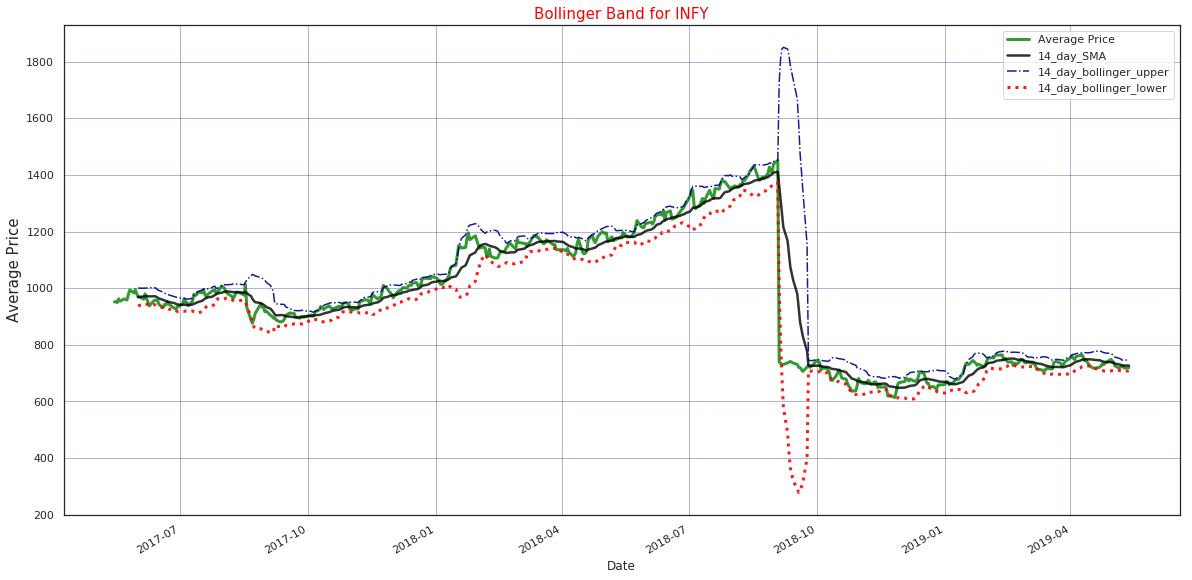

In [24]:
Bollinger_Bands = pd.DataFrame({'14_day_SMA': week_2['Close Price'].rolling(14).mean(),
                        '14_day_STD':week_2['Close Price'].rolling(14).std(),
                        'Average Price':week_2['Average Price']})

Bollinger_Bands['14_day_bollinger_upper'] = Bollinger_Bands['14_day_SMA'] + Bollinger_Bands['14_day_STD']*2
Bollinger_Bands['14_day_bollinger_lower'] = Bollinger_Bands['14_day_SMA'] - Bollinger_Bands['14_day_STD']*2

plt.figure(figsize = (20,10))

Bollinger_Bands['Average Price'].plot(color = 'green', alpha = 0.8, linewidth = 3)
Bollinger_Bands['14_day_SMA'].plot(color = 'black', alpha = 0.8, linewidth = 2.5, linestyle='solid')
Bollinger_Bands['14_day_bollinger_upper'].plot(color = 'darkBlue', alpha = 0.9, linestyle='dashdot')
Bollinger_Bands['14_day_bollinger_lower'].plot(color = 'red', alpha = 0.9, linewidth = 3, linestyle='dotted')

plt.legend()
plt.grid(color = 'darkBlue', alpha = 0.3)
plt.title('Bollinger Band for INFY', size = 15, color='red')
plt.ylabel('Average Price',  size = 15)
plt.show();

In [21]:
Bollinger_Bands.head()

,14_day_SMA,14_day_STD,Average Price,14_day_bollinger_upper,14_day_bollinger_lower
Date,,,,,
2017-05-15,NaN,NaN,951.49,NaN,NaN
2017-05-16,NaN,NaN,952.92,NaN,NaN
2017-05-17,NaN,NaN,949.48,NaN,NaN
2017-05-18,NaN,NaN,962.61,NaN,NaN
2017-05-19,NaN,NaN,954.18,NaN,NaN


In [22]:
Bollinger_Bands.to_csv('week3.csv')